In [14]:
import pandas as pd

In [15]:
data = pd.read_csv("dataset_01.csv", usecols = ['author','text'])

In [16]:
data

,author,text
0,Charles Dickens,supposemuttering you you are a devil now says ...
1,Charles Dickens,might have supposed that the course was straig...
2,Charles Dickens,term request the iron gentleman to walk this w...
3,Charles Dickens,creature save himself appears except in one di...
4,Charles Dickens,shabby palanquin is borne towards them surroun...
...,...,...
24995,Jules Verne,that his powerful vessel has conquered the sea...
24996,Jules Verne,sometimes crossed his arms and observed the se...
24997,Jules Verne,preparation of some of them i acknowledged tha...
24998,Jules Verne,strike against this submarine barrier i showed...


In [17]:
data.shape

(25000, 2)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import plot_confusion_matrix

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
X_train, X_val, y_train, y_val = train_test_split(data["text"], data["author"], test_size=0.2, random_state=2000)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=2000)

In [33]:
clf = Pipeline([('tfidf',TfidfVectorizer()),('clf1',LogisticRegression(solver='liblinear',C=1000,max_iter=1000))])

In [34]:
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf1',
                 LogisticRegression(C=1000, max_iter=1000,
                                    solver='liblinear'))])

                        precision    recall  f1-score   support

       Charles Dickens       0.69      0.62      0.65       998
          George Eliot       0.73      0.73      0.73      1004
           Jane Austen       0.79      0.84      0.81      1007
           Jules Verne       0.87      0.85      0.86       969
Sir Arthur Conan Doyle       0.78      0.82      0.80      1022

              accuracy                           0.77      5000
             macro avg       0.77      0.77      0.77      5000
          weighted avg       0.77      0.77      0.77      5000

accuracy_score: 0.772


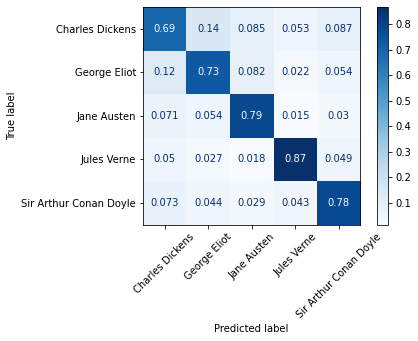

In [35]:
y_pred = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test, normalize='pred', cmap='Blues', xticks_rotation=45) 
print(classification_report(y_test, y_pred))
print( "accuracy_score: " + str(accuracy_score(y_test, y_pred)))

                        precision    recall  f1-score   support

       Charles Dickens       0.70      0.64      0.67       985
          George Eliot       0.73      0.72      0.72       986
           Jane Austen       0.81      0.84      0.82      1016
           Jules Verne       0.88      0.86      0.87      1043
Sir Arthur Conan Doyle       0.76      0.84      0.80       970

              accuracy                           0.78      5000
             macro avg       0.78      0.78      0.78      5000
          weighted avg       0.78      0.78      0.78      5000

accuracy_score: 0.7794


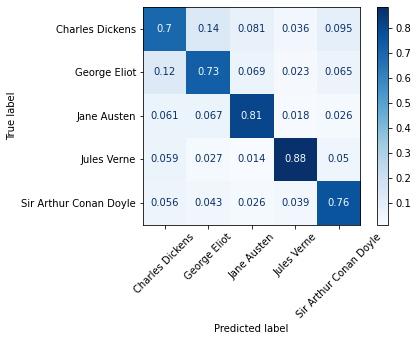

In [36]:
y_pred = clf.predict(X_val)
plot_confusion_matrix(clf, X_val, y_val, normalize='pred', cmap='Blues', xticks_rotation=45) 
print(classification_report(y_val, y_pred))
print( "accuracy_score: " + str(accuracy_score(y_val, y_pred)))

In [25]:
import random

In [26]:
iteration_number = 20

In [27]:
random_states = range(1,21)

In [28]:
accuracy_test = []
accuracy_validation = []

In [29]:
for seed_number in random_states:
    # Train, Test, Validation Spit ratios 60%, 20%, 20% 

    X_train, X_val, y_train, y_val = train_test_split(data["text"], data["author"], test_size=0.2, random_state=2000)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=seed_number) # 0.25 x 0.8 = 0.2    
    
   # clf = Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC( C = 10000, gamma = 'auto'))])
    
    clf.fit(X_train, y_train)    
    
    y_pred = clf.predict(X_test)    
    accuracy_test.append (accuracy_score(y_test, y_pred))
    
    y_pred = clf.predict(X_val)    
    accuracy_validation.append (accuracy_score(y_val, y_pred))
    

In [30]:
accuracy_test

[0.7784,
 0.7816,
 0.7742,
 0.7674,
 0.778,
 0.7704,
 0.7754,
 0.7752,
 0.7728,
 0.781,
 0.7728,
 0.778,
 0.781,
 0.78,
 0.7808,
 0.7844,
 0.7782,
 0.7898,
 0.7788,
 0.7688]

In [31]:
final_test_accuracy = 0
for accuracy in accuracy_test:
    final_test_accuracy += accuracy
final_test_accuracy = final_test_accuracy/iteration_number

print( "averaged test accuracy score: " + str(final_test_accuracy))

averaged test accuracy score: 0.77735
